In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2023-09-24 16:42:10--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-09-24 16:42:10 (123 MB/s) - ‘housing.csv’ saved [1423529/1423529]



EDA

In [4]:
df = pd.read_csv('housing.csv')

In [15]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

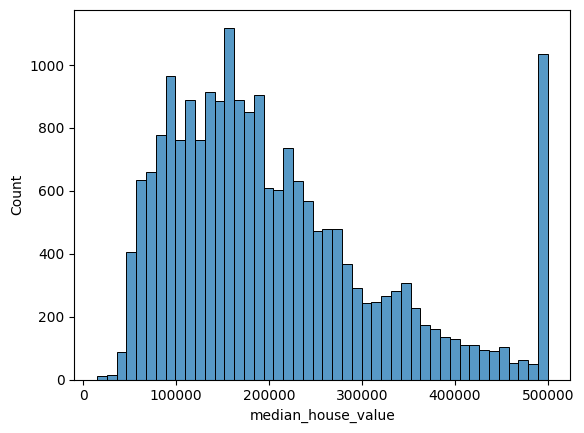

In [8]:
sns.histplot(df.median_house_value)

The median_house_value variable does not have a long tail.

Preparing the dataset

In [9]:
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [10]:
house_value_logs = np.log1p(df.median_house_value)
house_value_logs

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

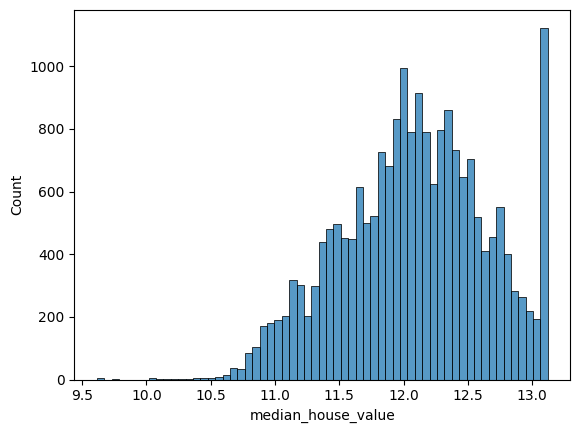

In [11]:
sns.histplot(house_value_logs)

In [14]:
df[df['ocean_proximity'] == '<1H OCEAN']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1H OCEAN
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN


In [16]:
df[df['ocean_proximity'] == 'INLAND']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
df = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
del df['ocean_proximity']

In [25]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [26]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [27]:
df['population'].median()

1195.0

Prepare and split the dataset

In [28]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [37]:
df.reset_index(drop=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [32]:
n = len(df)
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 15684, 15685, 15686])

In [34]:
np.random.seed(42)
np.random.shuffle(idx)

In [35]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [42]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [43]:
n, n_val + n_test + n_train

(15687, 15687)

In [44]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [46]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_test:]]

In [51]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [57]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [60]:
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

In [61]:
del df_train['median_house_value'];
del df_val['median_house_value'];
del df_test['median_house_value'];

In [69]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [70]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [76]:
def prepare_X(df):
  df_num = df.copy()
  df_num = df.fillna(0)
  X = df_num.values
  return X

In [84]:
# TRAINING
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# VALIDATION
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

0.34

In [81]:
def prepare_X(df):
  mean = df['total_bedrooms'].mean()
  df_num = df.copy()
  df_num = df.fillna(mean)
  X = df_num.values
  return X

In [85]:
# TRAINING
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# VALIDATION
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred).round(2)

0.34

In [86]:
def train_linear_regression_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [90]:
def prepare_X(df):
  df_num = df.copy()
  df_num = df.fillna(0)
  X = df_num.values
  return X

In [91]:
for r in [0.0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r = r)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred).round(2)

  print(r, score)

0.0 0.34
1e-06 0.34
0.0001 0.34
0.001 0.34
0.01 0.34
0.1 0.34
1 0.34
5 0.35
10 0.35


In [96]:
def prepare_data(seed):
  idx = np.arange(n)
  np.random.seed(seed)
  np.random.shuffle(idx)
  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_test:]]
  df_train = df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)
  return df_train, df_val, df_test

In [102]:
def prepare_y(df_train, df_val, df_test):
  # y_train = df_train['median_house_value']
  # y_val = df_val['median_house_value']
  # y_test = df_test['median_house_value']
  y_train = np.log1p(df_train['median_house_value'])
  y_val = np.log1p(df_val['median_house_value'])
  y_test = np.log1p(df_test['median_house_value'])
  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']
  return y_train, y_val, y_test

In [98]:
def prepare_X(df):
  df_num = df.copy()
  df_num = df.fillna(0)
  X = df_num.values
  return X

In [104]:
std = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
  df_train, df_val, df_test = prepare_data(s)
  y_train, y_val, y_test = prepare_y(df_train, df_val, df_test)

  X_train = prepare_X(df_train)
  w0, w = train_linear_regression(X_train, y_train)

  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)
  score = rmse(y_val, y_pred)
  std.append(score)

np.std(std).round(3)

0.005

In [105]:
df_train, df_val, df_test = prepare_data(9)
y_train, y_val, y_test = prepare_y(df_train, df_val, df_test)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3349899336611418